# ML 1. Two class classification problem

In [3]:
%pylab inline

import seaborn

Populating the interactive namespace from numpy and matplotlib


Consider a classification problem with two classes: 

C1 with $$\mu_1 = -1, \sigma_1 = 1$$   
C2 with $$\mu_2 = 1, \sigma_2 = 1$$ 

and assume the classes to be equiprobable: $$P(w_1) = p(w_2) = 0.5$$

Plot the pdf of each function.


$p(x|w) =\frac{1}{\sqrt{2\sigma^2\pi}}\, e^{-\frac{(x - \mu)^2}{2 \sigma^2}}$

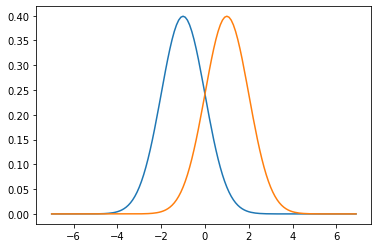

In [4]:
def npdf(x,u,s):
    return 1/(sqrt(2*pi*s*s))*exp((-(x-u)**2)/(2*s*s))

dx = 0.1
x = arange(-7,7,dx)
u1 = -1; s1= 1
u2 = 1; s2 = 1
p1 = npdf(x,u1,s1)
p2 = npdf(x,u2,s2)

plot(x,p1)
plot(x,p2)


Derive the error formula by integrating the discriminative function

$$g_i(x) = p(x|w_i)*p(w_i)  $$

Compute the error as $P_e = 1 - \int_{-\infty}^{\infty}\max_i(g_i)$

0.15885696448082753

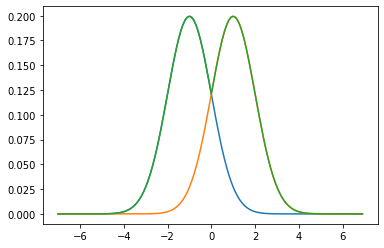

In [6]:
g1 = p1*0.5
g2 = p2*0.5

plot(x,g1)
plot(x,g2)

ac = array([max(a,b) for a,b in zip(g1,g2)])

plot(x,ac)

1 - sum(ac)*dx


Calculate the error analiticaly: $ e =  2 \int_{-\infty}^0 g_2$

$cdf = \int pdf, cdf = \frac12\left[1 + \operatorname{erf}\left( \frac{x-\mu}{\sigma\sqrt{2}}\right)\right] p(w) $

Estimate the error mesuring the probility of a sample from the distribuition being classifed wrongly

In [10]:
from scipy.special import erf
e = (1+erf((0-1)/sqrt(2)))*0.5 
print(e)

0.15865525393145707


Use sklearn to learn and test the classification

1. Generate de data

In [14]:
N = 1e6
d = randn(int(N))+u2
sum(d<0)/float(N)

0.158532

2. Divide the data in test and train sets
3. Fit and classify
4. Measure the error

Observe the trained parameters (model.std_)